### <b>**Deep Regression** </b>

#### <b> **Problem Statement:** </b>

Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

#### <b> **Analysis to be done:** </b>

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

#### <b> **Solution:**</b>

#### Importing Libraries

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Importing and checking the dataset

In [2]:
# Importing the dataset

inp0 = pd.read_csv("./googleplaystore.csv")

In [3]:
# Checking first two rows

inp0.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Checking number of columns and rows, data types, Non-Null count

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### <b> **Finding and Treating Null Values**</b>

In [5]:
#Finding count of null values

inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#Dropping the records with null ratings
#This is done because ratings is our target variable

inp0.dropna(how ='any', inplace = True)

In [7]:
inp0.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


#### <b> Handling the Variables </b>

**1. Clean the price column**

In [9]:
#Cleaning the price column

inp0.Price.value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

#### <b> Observations </b>
Some have dollars, some have 0
* We need to conditionally handle this.
* First, let's modify the column to take 0 if value is 0, else take the first letter onwards.

In [10]:
#Modifying the column
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [11]:
#Cleaning the price column
inp0[inp0['Price'] !=0.0]['Price'].head(10)

234    4.99
235    4.99
290    4.99
291    4.99
427    3.99
476    3.99
477    6.99
481    7.99
571    3.99
851    3.99
Name: Price, dtype: float64

In [12]:
inp0.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


**The other columns with numeric data are:<br>**
1. Reviews
2. Installs
3. Size

**2. Convert reviews to numeric**

In [13]:
inp0.Reviews.value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
666521     1
342912     1
4272       1
5517       1
398307     1
Name: Reviews, Length: 5990, dtype: int64

In [14]:
#Converting reviews to numeric
inp0.Reviews = inp0.Reviews.astype("int32")

In [15]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

**3. Handle the installs column**

In [16]:
#Handling the installs column
inp0.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

We'll need to remove the commas and the plus signs.

<b> Defining function for the same </b>

In [17]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [18]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [19]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [20]:
inp0.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

**4. Handle the app size field**

In [21]:
inp0["Size"].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [22]:
#Handling the app size field
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [23]:
inp0["Size"] = inp0["Size"].map(change_size)

In [24]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [25]:
inp0["Size"].value_counts()

14000.0    165
12000.0    161
15000.0    159
11000.0    159
13000.0    157
          ... 
383.0        1
454.0        1
812.0        1
442.0        1
619.0        1
Name: Size, Length: 411, dtype: int64

In [26]:
#Filling Size which had NA
inp0.Size.fillna(method = 'ffill', inplace = True)

In [27]:
#Checking datatypes
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### **Sanity checks**

1. Average rating should be between 1 and 5, as only these values are allowed on Play Store. Drop any rows that have a value outside this range.

In [28]:
#Checking the rating
inp0.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### <b> Observations </b>

Min is 1 and max is 5. None of the values have rating outside the range.

2. Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [29]:
#Checking and counting the rows
len(inp0[inp0.Reviews > inp0.Installs])

7

In [30]:
inp0[inp0.Reviews > inp0.Installs][['Reviews','Installs']]

,Reviews,Installs
2454,4,1
4663,10249,10000
5917,2,1
6700,7,5
7402,11,10
8591,20,10
10697,2,1


In [31]:
inp0 = inp0[inp0.Reviews <= inp0.Installs].copy()

In [32]:
inp0[inp0.Reviews > inp0.Installs][['Reviews','Installs']]

,Reviews,Installs


In [33]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9353 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9353 non-null   object 
 1   Category        9353 non-null   object 
 2   Rating          9353 non-null   float64
 3   Reviews         9353 non-null   int32  
 4   Size            9353 non-null   float64
 5   Installs        9353 non-null   int64  
 6   Type            9353 non-null   object 
 7   Price           9353 non-null   float64
 8   Content Rating  9353 non-null   object 
 9   Genres          9353 non-null   object 
 10  Last Updated    9353 non-null   object 
 11  Current Ver     9353 non-null   object 
 12  Android Ver     9353 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 986.4+ KB


3. For free apps **(Type == “Free”)**, the price should not be **> 0**. Drop any such rows.

In [34]:
len(inp0[(inp0.Type == "Free") & (inp0.Price>0)])

0

#### **EDA**

#### <b> Box Plot: Price</b>

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


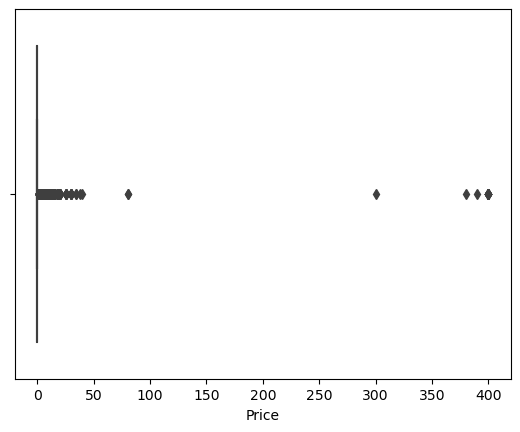

In [35]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Price)
plt.show()

#### <b> Box Plot: Reviews</b>

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


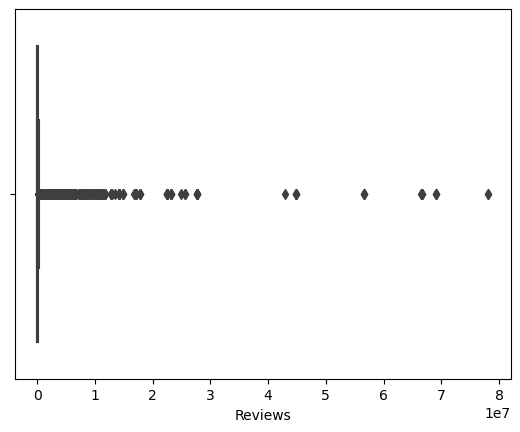

In [36]:
#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(inp0.Reviews)
plt.show()

#### **Checking Distribution and Skewness:**

How are the ratings distributed? Is it more toward higher ratings?

##### **Distribution of Ratings**

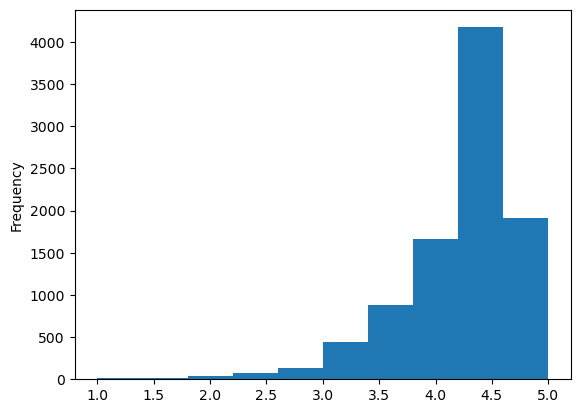

In [37]:
#Distributing the ratings
inp0.Rating.plot.hist()
#Show plot
plt.show()

##### **Histogram: Size**

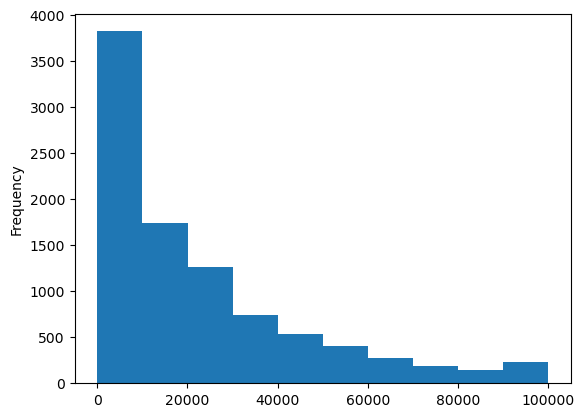

In [38]:
inp0['Size'].plot.hist()
#Show plot
plt.show()

#### <b> Observations </b>
A histogram is plotted with ratings on the x-axis and frequency on the y-axis, and the ratings are distributed.

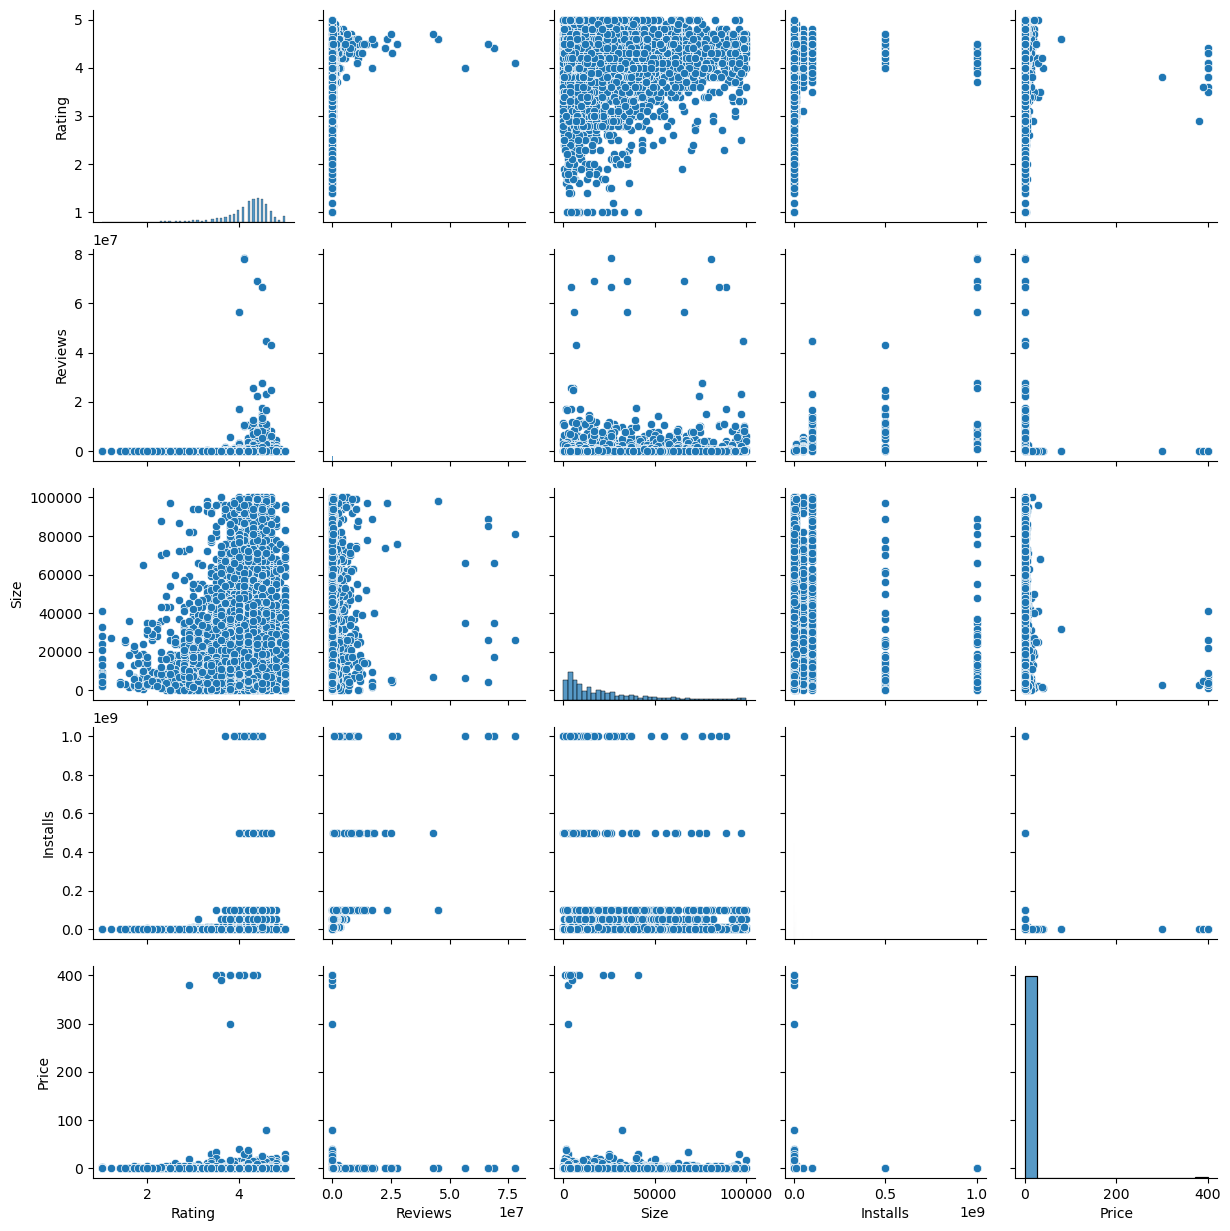

In [39]:
#Pair plot
sns.pairplot(data=inp0)

##### **Outlier Treatment:**


##### **1. Price:** 

From the box plot, it seems like there are some apps with very high prices. A price of $200 for an application on the Play Store is very high and suspicious.
Check the records that have very high price:
Is 200 a high price?

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


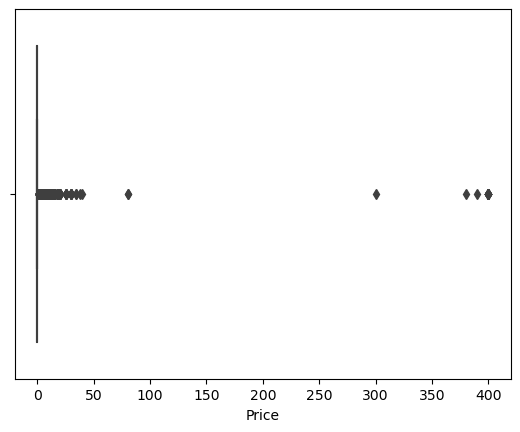

In [40]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Price)
plt.show()

In [41]:
#Checking the records
len(inp0[inp0.Price > 200])

15

In [42]:
inp0[inp0.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [43]:
inp0 = inp0[inp0.Price <= 200].copy()
inp0.shape

(9338, 13)

##### **2. Reviews:**

Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


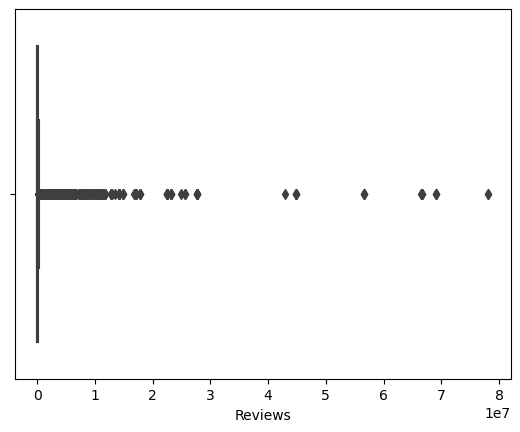

In [44]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Reviews)
plt.show()

In [45]:
#Dropping the records with more than 2 million reviews
inp0 = inp0[inp0.Reviews <= 2000000]
inp0.shape

(8885, 13)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


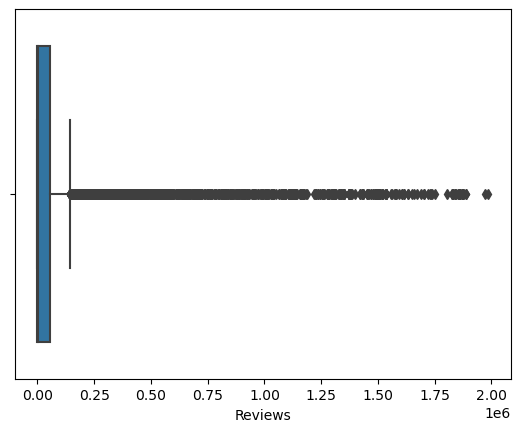

In [46]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Reviews)
plt.show()

##### **3. Installs:**

There seem to be some outliers in this field too. Apps having a very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.

Decide a threshold as the cutoff for outliers and drop records having values more than the threshold.




C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


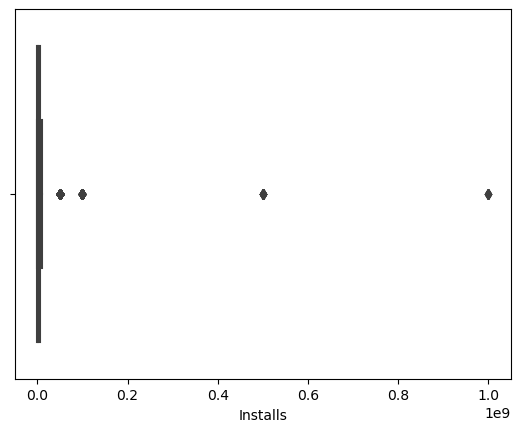

In [47]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Installs)
plt.show()

In [48]:
inp0.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99,1])

0.10    1.000000e+03
0.25    1.000000e+04
0.50    5.000000e+05
0.70    1.000000e+06
0.90    1.000000e+07
0.95    1.000000e+07
0.99    1.000000e+08
1.00    1.000000e+09
Name: Installs, dtype: float64

In [49]:
#Dropping the apps that have a very high number of installs
inp0.Installs.describe(percentiles=[0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99,1])

count    8.885000e+03
mean     6.267379e+06
std      3.539960e+07
min      5.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      5.000000e+05
70%      1.000000e+06
90%      1.000000e+07
95%      1.000000e+07
99%      1.000000e+08
100%     1.000000e+09
max      1.000000e+09
Name: Installs, dtype: float64

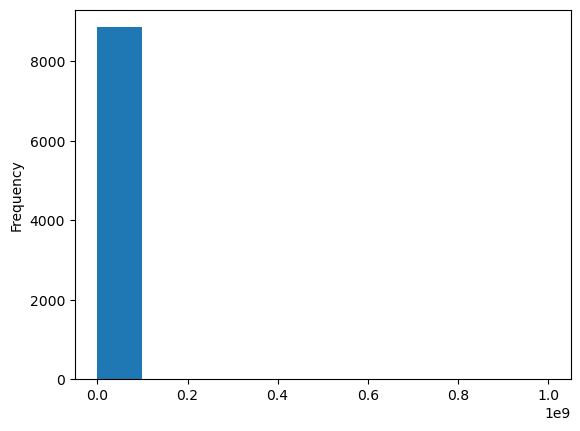

In [50]:
#Distributing the ratings
inp0.Installs.plot.hist()
#Show plot
plt.show()

#### <b> Observations </b>

Looks like there are just 1% of apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [51]:
#Dropping the apps with more than 100M installs
len(inp0[inp0.Installs >= 1000000000])

6

In [52]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape

(8879, 13)

In [53]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

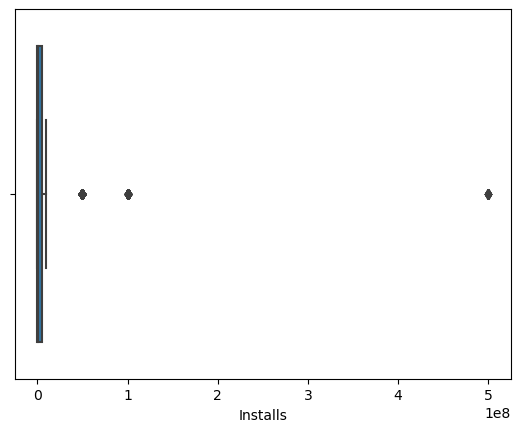

In [54]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Installs)
plt.show()

In [55]:
#Dropping the apps that have a very high number of installs
inp0.Installs.describe(percentiles=[0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99,1])

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      5.000000e+05
70%      1.000000e+06
90%      1.000000e+07
95%      1.000000e+07
99%      1.000000e+08
100%     5.000000e+08
max      5.000000e+08
Name: Installs, dtype: float64

#### **Bi-variate Analysis:**

Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relationhips between rating and the other features.

##### **1.	Make scatter plot/join plot for Rating vs. Price**

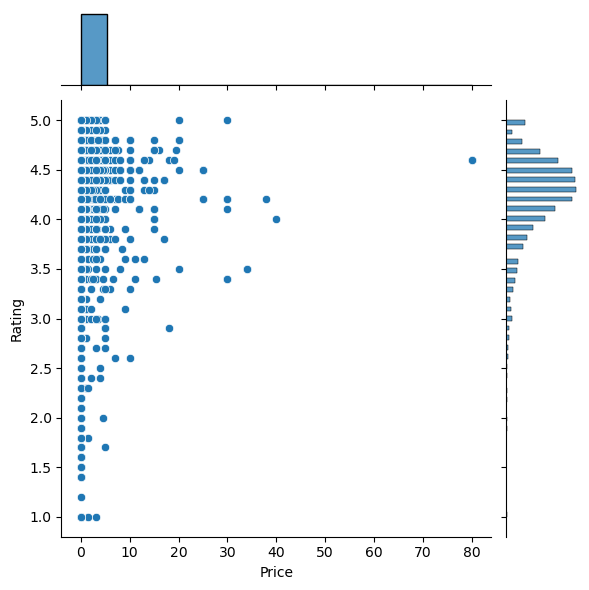

In [56]:
#What pattern do you observe? Does rating increase with price?
sns.jointplot(inp0.Price, inp0.Rating)

##### **2.	Make scatter plot/joinplot for Rating vs Size**

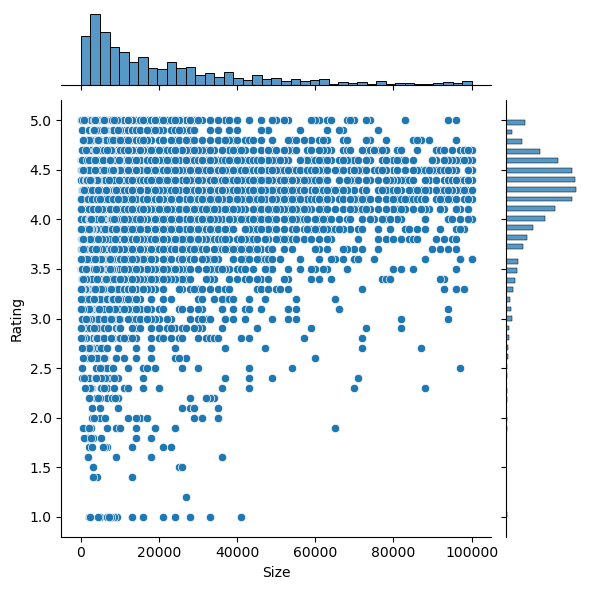

In [57]:
#Are heavier apps rated better?
sns.jointplot(inp0.Size, inp0.Rating)

##### **3.	Make scatter plot/joinplot for Rating vs Reviews**

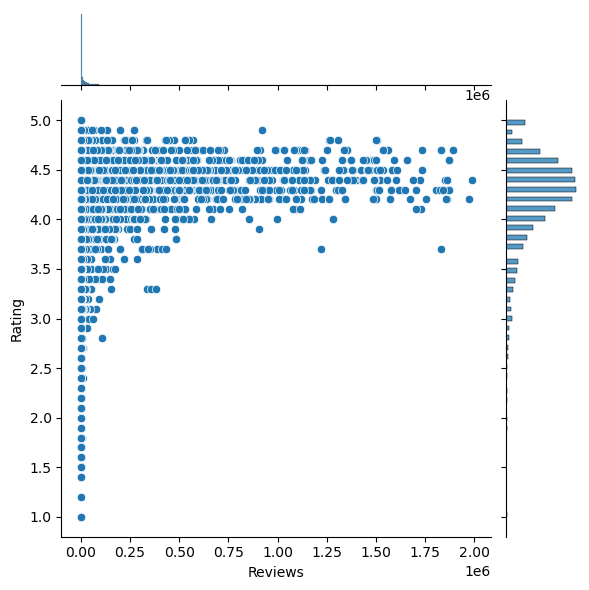

In [58]:
# Does more review mean a better rating always?
sns.jointplot(inp0.Reviews, inp0.Rating)

##### **4.	Make boxplot for Rating vs Content Rating**

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

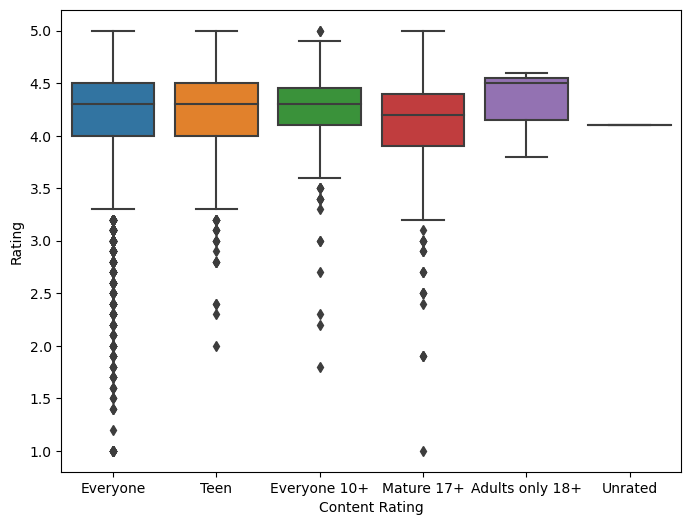

In [59]:
#Is there any difference in the ratings? Are some types liked better?
plt.figure(figsize=[8,6])
sns.boxplot(inp0['Content Rating'], inp0.Rating)

##### **5. Make boxplot for Ratings vs. Category**

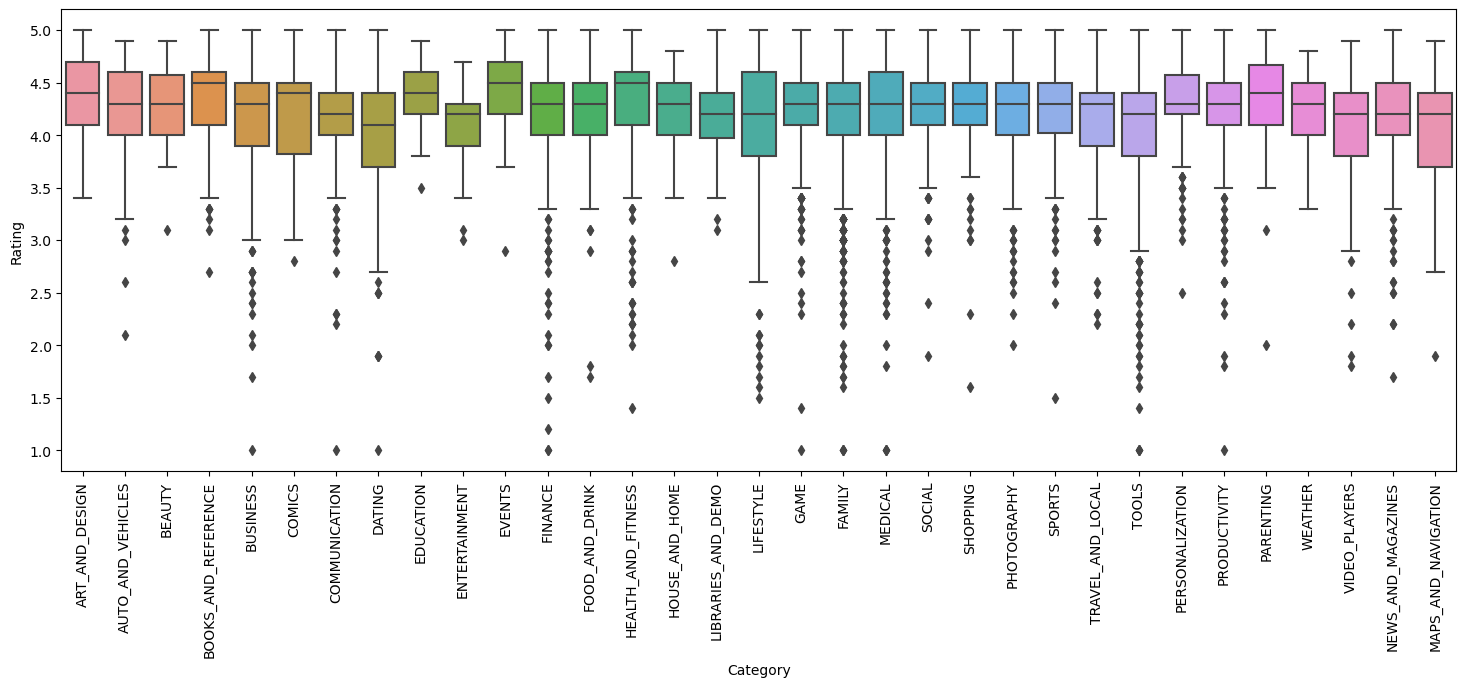

In [60]:
#Which genre has the best ratings?
plt.figure(figsize=[18,6])
g = sns.boxplot(inp0.Category, inp0.Rating)
plt.xticks(rotation=90);

#### **Pre-processing the Dataset**

##### **1. Make a copy of the dataset**

In [61]:
# Making a copy
inp1 = inp0.copy()

##### **2. Apply log transformation (np.log1p) to Reviews and Installs**

Reviews and Installs have some values that are still relatively very high.
Before building a linear regression model, you need to reduce the skew.

In [62]:
#Reducing the skew
inp0.Installs.describe()

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [63]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [64]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

##### **3. Drop columns App, Last Updated, Current Ver, and Android Ver**

 These variables are not useful for our task.

In [65]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [66]:
#Dropping the variables that are not useful for our task
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape

(8879, 9)

##### **4. Dummy Columns:**


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric fields. Name of the dataframe should be **inp2**.

In [67]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8879 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8879 non-null   object 
 1   Rating          8879 non-null   float64
 2   Reviews         8879 non-null   float64
 3   Size            8879 non-null   float64
 4   Installs        8879 non-null   float64
 5   Type            8879 non-null   object 
 6   Price           8879 non-null   float64
 7   Content Rating  8879 non-null   object 
 8   Genres          8879 non-null   object 
dtypes: float64(5), object(4)
memory usage: 951.7+ KB


In [68]:
inp1.Category.value_counts()

FAMILY                 1705
GAME                    926
TOOLS                   709
MEDICAL                 349
PRODUCTIVITY            333
FINANCE                 317
SPORTS                  314
LIFESTYLE               307
BUSINESS                303
PERSONALIZATION         298
HEALTH_AND_FITNESS      296
PHOTOGRAPHY             288
COMMUNICATION           256
SOCIAL                  229
NEWS_AND_MAGAZINES      226
SHOPPING                221
TRAVEL_AND_LOCAL        219
DATING                  195
BOOKS_AND_REFERENCE     174
EDUCATION               151
VIDEO_PLAYERS           151
ENTERTAINMENT           142
MAPS_AND_NAVIGATION     120
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [69]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [70]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [71]:
inp2.shape

(8879, 157)

In [72]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8879 entries, 0 to 10840
Columns: 157 entries, Rating to Genres_Word
dtypes: float64(5), uint8(152)
memory usage: 1.9 MB


#### **Train-test split**

Let us distribute the data into **training** and **test** datasets using the **train_test_split()** function.

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
#?train_test_split

In [75]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [76]:
df_train.shape, df_test.shape

((6215, 157), (2664, 157))

Let us separate the dataframes into **X_train, y_train, X_test, y_test.**

In [77]:
y_train = df_train.pop("Rating")
X_train = df_train

In [78]:
X_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
1279,7.63627,6900.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
y_test = df_test.pop("Rating")
X_test = df_test

In [80]:
X_test.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
1161,9.329456,24000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <b> **Regression Algorithms:**</b>



#### Import statsmodel Library for Linear Regression

In [81]:
#Importing the statsmodel library
import statsmodels.api as sm

In [82]:
#Applying linear regression
model1 = sm.OLS(y_train, X_train)

In [83]:
model1 = model1.fit()

In [84]:
#Finding the summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3717.
Date:                Mon, 20 May 2024   Prob (F-statistic):                        0.00
Time:                        00:29:19   Log-Likelihood:                         -4281.7
No. Observations:                6215   AIC:                                      8811.
Df Residuals:                    6091   BIC:                                      9646.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1752      0.006     28.037      0.000       0.163       0.187
Size                                         -2.896e-07   3.37e-07     -0.859      0.391   -9.51e-07    3.72e-07
Installs                                        -0.1499      0.006    -24.184      0.000      -0.162      -0.138
Price                                            0.0006      0.003      0.177      0.860      -0.006       0.007
Category_AUTO_AND_VEHICLES                       1.6381      0.125     13.136      0.000       1.394       1.883
Category_BEAUTY                                  1.7213      0.128     13.462      0.000       1.471       1.972
Category_BOOKS_AND_REFERENCE                     1.6843      0.122     13.826      0.000       1.445       1.923
Category_BUSINESS                                1.6046      0.121     13.272      0.000       1.368       1.842
Category_COMICS                                  2.3786      0.226     10.517      0.000       1.935       2.822
Category_COMMUNICATION                           1.5478      0.121     12.765      0.000       1.310       1.786
Category_DATING                                  1.5013      0.122     12.262      0.000       1.261       1.741
Category_EDUCATION                               2.8642      0.251     11.419      0.000       2.373       3.356
Category_ENTERTAINMENT                           2.7757      0.251     11.065      0.000       2.284       3.267
Category_EVENTS                                  1.7447      0.126     13.792      0.000       1.497       1.993
Category_FAMILY                                  2.8988      0.243     11.920      0.000       2.422       3.376
Category_FINANCE                                 1.5685      0.121     12.976      0.000       1.332       1.806
Category_FOOD_AND_DRINK                          1.5993      0.123     13.006      0.000       1.358       1.840
Category_GAME                                    3.1390      0.241     13.046      0.000       2.667       3.611
Category_HEALTH_AND_FITNESS                      1.6296      0.121     13.464      0.000       1.392       1.867
Category_HOUSE_AND_HOME                          1.6151      0.124     13.002      0.000       1.372       1.859
Category_LIBRARIES_AND_DEMO                      1.6541      0.125     13.247      0.000       1.409       1.899
Category_LIFESTYLE                               1.5913      0.121     13.156      0.000       1.354       1.828
Category_MAPS_AND_NAVIGATION                     1.5212      0.123     12.399      0.000       1.281       1.762
Category_MEDICAL                              

##### Identified values for model 1
* $R^2$ (uncentered): 0.987
* Adjusted $R^2$ (uncentered): 0.987
* F-statistic: 3717
* AIC: 8811
* BIC: 9646

#### **Prediction and evaluation using "model1"**

In [85]:
#Prediction and evaluation
import sklearn.metrics as metrics
y_test_pred= model1.predict(X_test)

In [86]:
#Assessing the model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
#RMSE of "model1" = 0.49203326281981113

0.49203326281999893


In [87]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100

print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: -2.5730378350664527


In [88]:
#Calculating MAPE
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.490934337928831


#### **Reiterating the Model**

**2. List:**

Identified 99 variables that have p-value $\leq$ 0.05.

'Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY','Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS','Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION','Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE','Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS','Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE','Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES','Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY','Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL','Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone','Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen','Content_Rating_Unrated','Genres_Art_&_Design','Genres_Art_&_Design;Creativity','Genres_Art_&_Design;Pretend_Play','Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board;Brain_Games','Genres_Books_&_Reference','Genres_Business','Genres_Casual','Genres_Casual;Action_&_Adventure','Genres_Casual;Brain_Games','Genres_Casual;Pretend_Play','Genres_Comics','Genres_Comics;Creativity','Genres_Communication','Genres_Dating','Genres_Education','Genres_Education;Action_&_Adventure','Genres_Education;Creativity','Genres_Education;Education','Genres_Education;Pretend_Play','Genres_Educational;Education','Genres_Educational;Pretend_Play','Genres_Entertainment','Genres_Entertainment;Brain_Games','Genres_Entertainment;Creativity','Genres_Entertainment;Music_&_Video','Genres_Events','Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home','Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical','Genres_Music;Music_&_Video','Genres_News_&_Magazines','Genres_Parenting','Genres_Parenting;Education','Genres_Parenting;Music_&_Video','Genres_Personalization','Genres_Photography','Genres_Productivity','Genres_Puzzle','Genres_Puzzle;Brain_Games','Genres_Racing;Action_&_Adventure','Genres_Role_Playing','Genres_Shopping','Genres_Simulation','Genres_Simulation;Action_&_Adventure','Genres_Social','Genres_Strategy','Genres_Tools','Genres_Tools;Education','Genres_Travel_&_Local','Genres_Travel_&_Local;Action_&_Adventure','Genres_Weather'

**3. Create a new dataset with chosen variables and split it into training and testing dataset**

In [89]:
#Create inp3

inp3 = inp2[['Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY','Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS','Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE','Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS','Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE','Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES','Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY','Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL','Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content Rating_Everyone','Content Rating_Everyone 10+','Content Rating_Mature 17+','Content Rating_Teen','Content Rating_Unrated','Genres_Art & Design','Genres_Art & Design;Creativity','Genres_Art & Design;Pretend Play','Genres_Auto & Vehicles','Genres_Beauty','Genres_Board;Brain Games','Genres_Books & Reference','Genres_Business','Genres_Casual','Genres_Casual;Action & Adventure','Genres_Casual;Brain Games','Genres_Casual;Pretend Play','Genres_Comics','Genres_Comics;Creativity','Genres_Communication','Genres_Dating','Genres_Education','Genres_Education;Action & Adventure','Genres_Education;Creativity','Genres_Education;Education','Genres_Education;Pretend Play','Genres_Educational;Education','Genres_Educational;Pretend Play','Genres_Entertainment','Genres_Entertainment;Brain Games','Genres_Entertainment;Creativity','Genres_Entertainment;Music & Video','Genres_Events','Genres_Finance','Genres_Food & Drink','Genres_Health & Fitness','Genres_House & Home','Genres_Libraries & Demo','Genres_Lifestyle','Genres_Maps & Navigation','Genres_Medical','Genres_Music;Music & Video','Genres_News & Magazines','Genres_Parenting','Genres_Parenting;Education','Genres_Parenting;Music & Video','Genres_Personalization','Genres_Photography','Genres_Productivity','Genres_Puzzle','Genres_Puzzle;Brain Games','Genres_Racing;Action & Adventure','Genres_Role Playing','Genres_Shopping','Genres_Simulation','Genres_Simulation;Action & Adventure','Genres_Social','Genres_Tools','Genres_Tools;Education','Genres_Travel & Local','Genres_Travel & Local;Action & Adventure','Genres_Weather']]

In [90]:
#Checking datatypes
inp3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                    uint8
Category_BEAUTY                               uint8
                                             ...   
Genres_Tools                                  uint8
Genres_Tools;Education                        uint8
Genres_Travel & Local                         uint8
Genres_Travel & Local;Action & Adventure      uint8
Genres_Weather                                uint8
Length: 98, dtype: object

In [91]:
inp3.shape

(8879, 98)

In [92]:
#split imp3
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [93]:
df_train.shape, df_test.shape

((6215, 98), (2664, 98))

**4. Separate the new dataframes into X_train, y_train, X_test, y_test**

In [94]:
#Separating the new dataframes
y_train1 = df_train.pop("Rating")
X_train1 = df_train

In [95]:
X_train1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Social,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Weather
1279,7.63627,11.512935,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
y_test1 = df_test.pop("Rating")
X_test1 = df_test

In [97]:
X_test1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Social,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Weather
1161,9.329456,13.815512,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**5. Create the second model**

In [98]:
#Apply linear regression
model2 = sm.OLS(y_train1, X_train1)

In [99]:
model2 = model2.fit()

In [100]:
#Find the summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6504.
Date:                Mon, 20 May 2024   Prob (F-statistic):                        0.00
Time:                        00:29:20   Log-Likelihood:                         -4302.6
No. Observations:                6215   AIC:                                      8747.
Df Residuals:                    6144   BIC:                                      9225.
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1738      0.006     28.132      0.000       0.162       0.186
Installs                                    -0.1479      0.006    -24.055      0.000      -0.160      -0.136
Category_AUTO_AND_VEHICLES                   1.5997      0.124     12.896      0.000       1.357       1.843
Category_BEAUTY                              1.6842      0.127     13.237      0.000       1.435       1.934
Category_BOOKS_AND_REFERENCE                 1.6478      0.121     13.598      0.000       1.410       1.885
Category_BUSINESS                            1.5673      0.120     13.034      0.000       1.332       1.803
Category_COMICS                              2.3321      0.225     10.342      0.000       1.890       2.774
Category_COMMUNICATION                       1.5107      0.121     12.527      0.000       1.274       1.747
Category_DATING                              1.4689      0.122     12.051      0.000       1.230       1.708
Category_EDUCATION                           2.9756      0.247     12.059      0.000       2.492       3.459
Category_ENTERTAINMENT                       2.8889      0.247     11.707      0.000       2.405       3.373
Category_EVENTS                              1.7090      0.126     13.576      0.000       1.462       1.956
Category_FAMILY                              3.0087      0.239     12.582      0.000       2.540       3.477
Category_FINANCE                             1.5307      0.120     12.732      0.000       1.295       1.766
Category_FOOD_AND_DRINK                      1.5607      0.122     12.760      0.000       1.321       1.800
Category_GAME                                3.0848      0.239     12.908      0.000       2.616       3.553
Category_HEALTH_AND_FITNESS                  1.5907      0.120     13.216      0.000       1.355       1.827
Category_HOUSE_AND_HOME                      1.5767      0.124     12.760      0.000       1.334       1.819
Category_LIBRARIES_AND_DEMO                  1.6165      0.124     13.014      0.000       1.373       1.860
Category_LIFESTYLE                           1.5543      0.120     12.919      0.000       1.318       1.790
Category_MAPS_AND_NAVIGATION                 1.4831      0.122     12.154      0.000       1.244       1.722
Category_MEDICAL                             1.5984      0.120     13.312      0.000       1.363       1.834
Category_NEWS_AND_MAGAZINES                  1.5285      0.121     12.670      0.000       1.292       1.765
Category_PARENTING                           2.4737      0.212     11.679      0.000       2.058       2.889
Category_PERSONALIZATION                 

* Rating	R-squared (uncentered):	0.987

* Adj. R-squared (uncentered): 0.987

* F-statistic: 6412

* AIC: 8749

* BIC: 9234

#### **How Well Does the Model Fit the Data?**
 ***model2* performs better:**


* R-squared value:<br>

  The most common way to evaluate the overall fit of a linear model is by the **R-squared** value.<br>

  R-squared is between 0 and 1 (or between 0 to 100%), and higher is better because it means that more variance is explained by the model.<br>

  In case of our models, model1 and model2 have same R-squared values.

* F-statistics:<br>

  In case of dataset that only have numerical values, it is said higher the F-statistic better the model.

  In case of our models, model2 has more F-statistic value than model1.

* AIC and BIC: <br>

  In case of models, lesser the AIC and BIC, better the model.

  In case of models, model2 has lesser AIC and BIC values than the model1.

**Prediction using "model2"**

Let us perform prediction using model2 by importing **sklearn.metrics**

In [101]:
#Importing sklearn.metrics
import sklearn.metrics as metrics
y_test_pred1= model2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))


#RMSE value of model1 = 0.49203326281981113 

0.49102792119963273


In [102]:
#Calculating MAPE
def MAPE(y_test_pred1,y_test1):
    return np.mean(np.abs((y_test1 - y_test_pred1) / y_test1)) * 100
print ('MAPE: ' + str(MAPE(y_test_pred1,y_test1)) )

MAPE: 9.467683724566339


**model2** shows slight improvement as the RMSE and MAPE value of this model is lesser than that of **model1**.

**1. Ridge Regression:**

In [103]:
#Importing Ridge
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(X_train1,y_train1)

Ridge(alpha=0.001, normalize=True)

**Evaluating using RMSE:**

In [104]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, ridgeReg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, ridgeReg.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test1, y_test1)))

0.48012815226696043
0.48707333027596195
R2 Value/Coefficient of Determination: 0.136185745190175


**2. Lasso Regression:**

In [105]:
#Importing Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train1,y_train1)

Lasso(alpha=0.001, normalize=True)

**Evaluating using RMSE:**

In [106]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, lassoreg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, lassoreg.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test1, y_test1)))


0.520679541079235
0.5212800927272304
R2 Value/Coefficient of Determination: 0.01059535365885067


**3. ElasticNet Regression:**

In [107]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001, normalize=True)
Elastic.fit(X_train1,y_train1)


ElasticNet(alpha=0.001, normalize=True)

**Evaluating using RMSE:**

In [108]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, Elastic.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, Elastic.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test1, y_test1)))


0.5214331925073523
0.5220643755303499
R2 Value/Coefficient of Determination: 0.007615931276933607
